In [70]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [71]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [72]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv"

In [73]:
df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv", encoding= 'unicode_escape')

# Lasso

In [74]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df = df.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [76]:
# Create weekend column (1 if weekend, 0 if not weekend)
df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [77]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,0


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [80]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['yr',
 'holiday',
 'workingday',
 'mnth',
 'windspeed',
 'weekend',
 'hum',
 'temp',
 'season',
 'weekday',
 'weathersit']

In [81]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [82]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
X_train[0:10]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,weekend
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992,0
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817,0
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546,0
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117,1
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350,0
570,3,1,7,0,2,1,1,0.750833,0.655000,0.211454,0
250,3,0,9,0,4,1,3,0.633913,0.939565,0.192748,0
17,1,0,1,0,2,1,2,0.216667,0.861667,0.146775,0
595,3,1,8,0,6,0,1,0.678333,0.603333,0.177867,1
240,3,0,8,0,1,1,1,0.636667,0.554583,0.159825,0


In [84]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, "l,r,e_scaler.joblib")


['l,r,e_scaler.joblib']

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 11)
(584,)
(147, 11)
(147,)


In [87]:
X_train[0:10]

array([[0.33333333, 0.        , 0.27272727, 0.        , 0.83333333,
        1.        , 0.5       , 0.35024023, 0.80442593, 0.48605788,
        0.        ],
       [0.33333333, 1.        , 0.36363636, 0.        , 0.83333333,
        1.        , 0.        , 0.63925722, 0.35526299, 0.24873701,
        0.        ],
       [1.        , 1.        , 0.81818182, 0.        , 0.66666667,
        1.        , 0.5       , 0.75739478, 0.64174706, 0.19801995,
        0.        ],
       [0.33333333, 1.        , 0.36363636, 0.        , 0.        ,
        0.        , 0.        , 0.7004354 , 0.43122037, 0.48112329,
        1.        ],
       [1.        , 0.        , 0.81818182, 0.        , 0.16666667,
        1.        , 0.        , 0.35551467, 0.61363607, 0.16855453,
        0.        ],
       [0.66666667, 1.        , 0.54545455, 0.        , 0.33333333,
        1.        , 0.        , 0.87553235, 0.54425859, 0.44516526,
        0.        ],
       [0.66666667, 0.        , 0.72727273, 0.        , 0.

In [88]:
lasso_reg = Lasso(alpha = 0.01)

In [89]:
lasso_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [90]:
lasso_reg.coef_

array([11.70664985, 14.74853659, -2.21912007, -3.56919918,  2.83297896,
        0.81989629, -9.23157074, 34.11258273, -7.26940153, -9.35328619,
        0.        ])

In [91]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
season,11.706650
yr,14.748537
mnth,-2.219120
holiday,-3.569199
weekday,2.832979
workingday,0.819896
weathersit,-9.231571
temp,34.112583
hum,-7.269402
windspeed,-9.353286


In [92]:
lasso_reg.intercept_

np.float64(41.62786411195078)

In [93]:
lasso_reg.score(X_train,y_train)

0.779724859915109

In [94]:
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [95]:
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 5.651155689192925.
 The Mean Squred Error(MSE) is 54.275370524442984.
The Root Mean Squared Error(RMSE) is 7.3671819934383995.
The R2 Score is 0.8089272735834534.
Adjusted R2 is 0.7933583847643274.


In [96]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [97]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,5.6512,54.2754,7.3672,0.8089,0.7934


In [98]:
lasso_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [99]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -56.96189103741192


In [100]:
import joblib
joblib.dump(lasso_reg, "lasso.pkl")


['lasso.pkl']

In [101]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [102]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [103]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

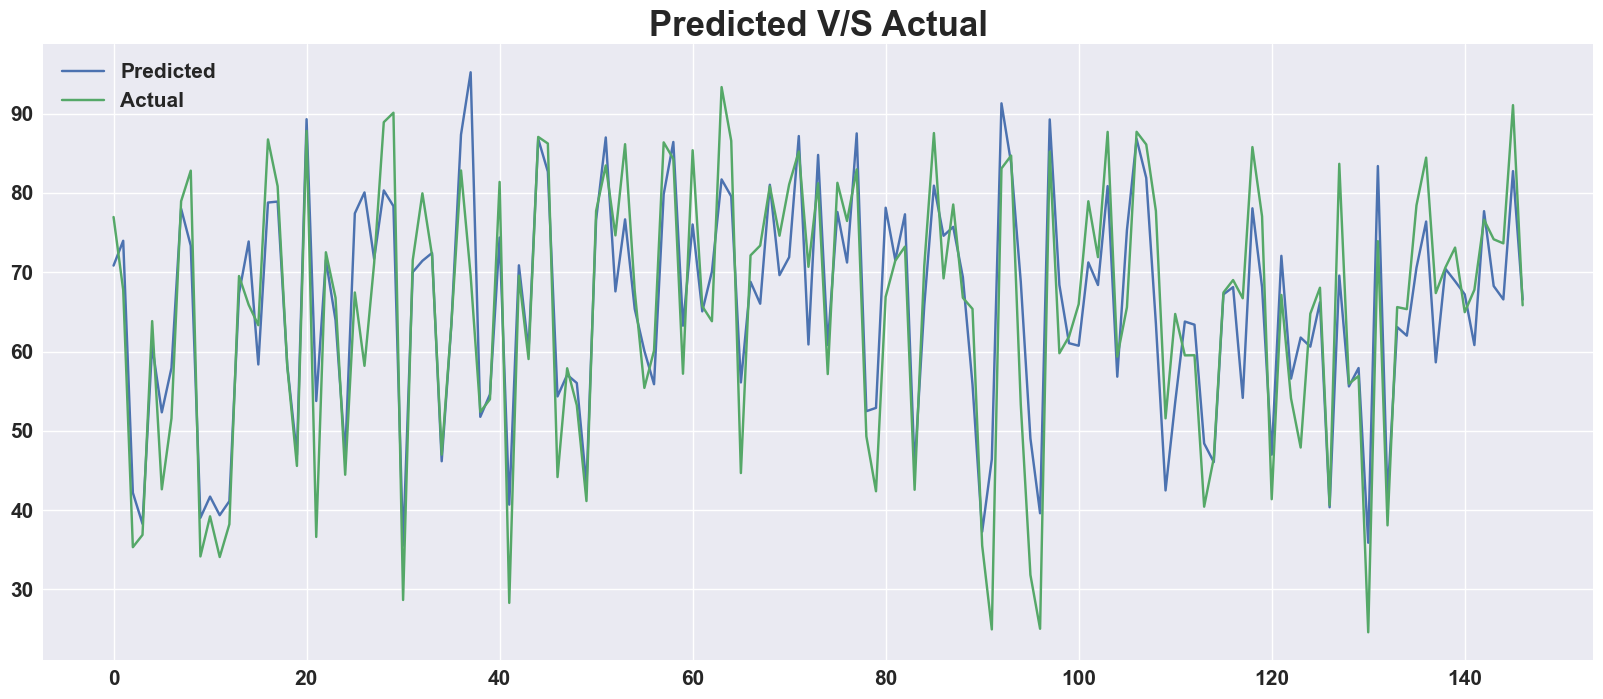

In [104]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

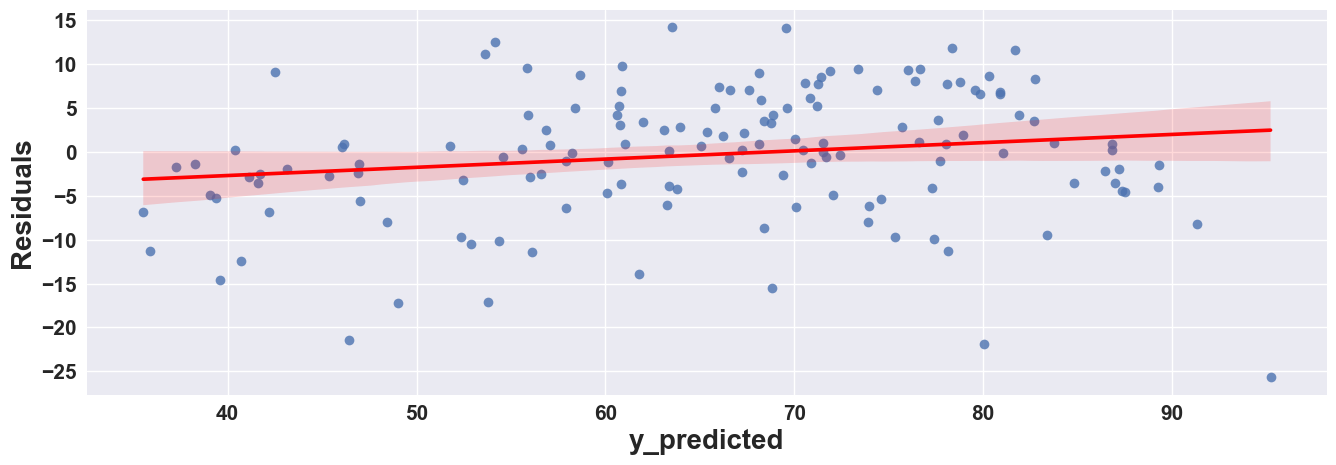

In [105]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

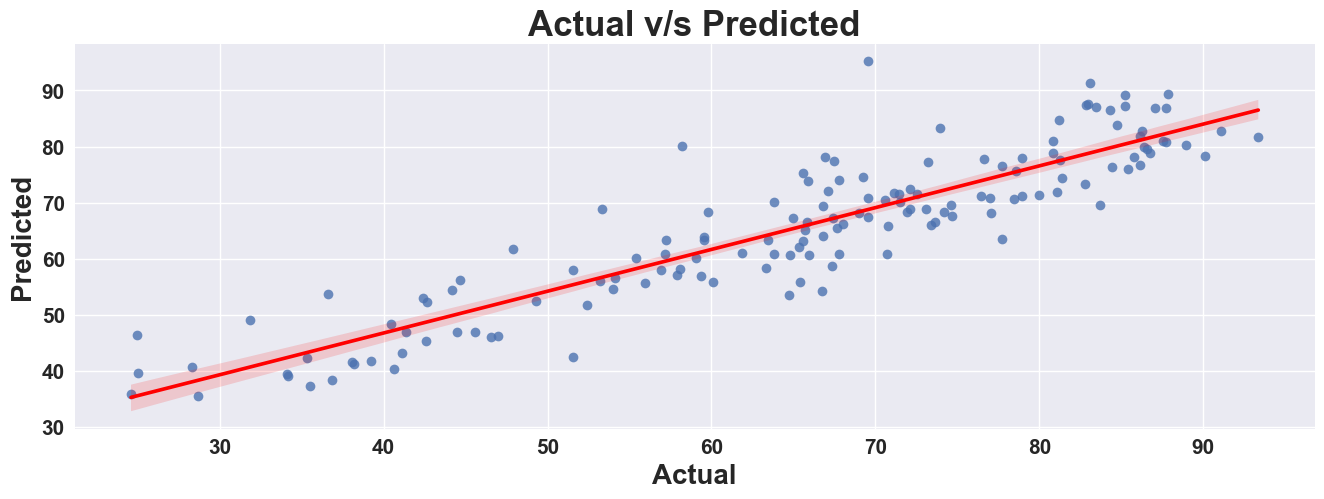

In [106]:
plot_scatter(y_pred,y_test)

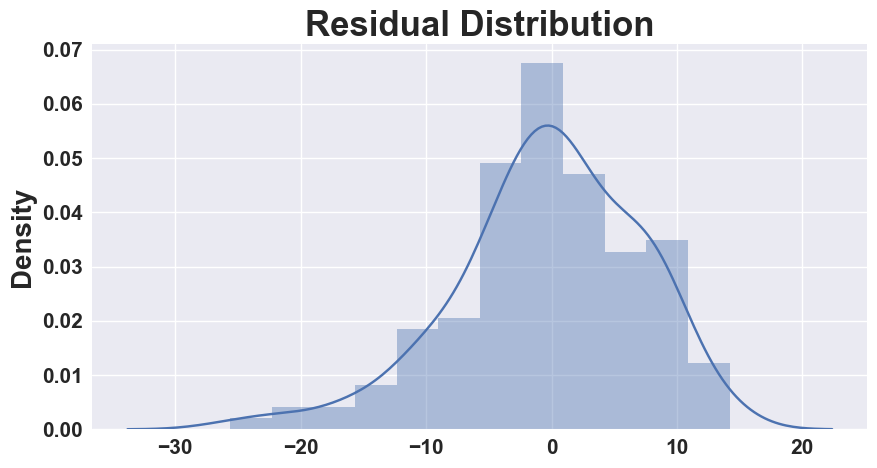

In [107]:
Residual_distPlot(y_pred,y_test)

# Ridge

In [108]:
ridge_reg = Ridge(alpha = 0.01)

In [109]:
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [110]:
ridge_reg.coef_

array([12.16839674, 14.76314492, -2.78355024, -2.88817213,  2.91799459,
        1.8550338 , -9.17556497, 34.21508118, -7.63918728, -9.67728568,
        1.03313833])

In [111]:
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
season,12.168397
yr,14.763145
mnth,-2.783550
holiday,-2.888172
weekday,2.917995
workingday,1.855034
weathersit,-9.175565
temp,34.215081
hum,-7.639187
windspeed,-9.677286


In [112]:
ridge_reg.intercept_

np.float64(40.8484681735982)

In [113]:
ridge_reg.score(X_train,y_train)

0.7798185032973979

In [114]:
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)


In [115]:
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 5.653822938170702.
 The Mean Squred Error(MSE) is 54.07013664788018.
The Root Mean Squared Error(RMSE) is 7.353239874224163.
The R2 Score is 0.8096497853962512.
Adjusted R2 is 0.7941397679100198.


In [116]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [117]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,5.6512,54.2754,7.3672,0.8089,0.7934
1,Ridge(GridsearchCv Tunned),5.6538,54.0701,7.3532,0.8096,0.7941


In [118]:
ridge_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)

ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [119]:
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -56.96189103741192


In [120]:
import joblib
joblib.dump(ridge_rg, "ridge.pkl")


['ridge.pkl']

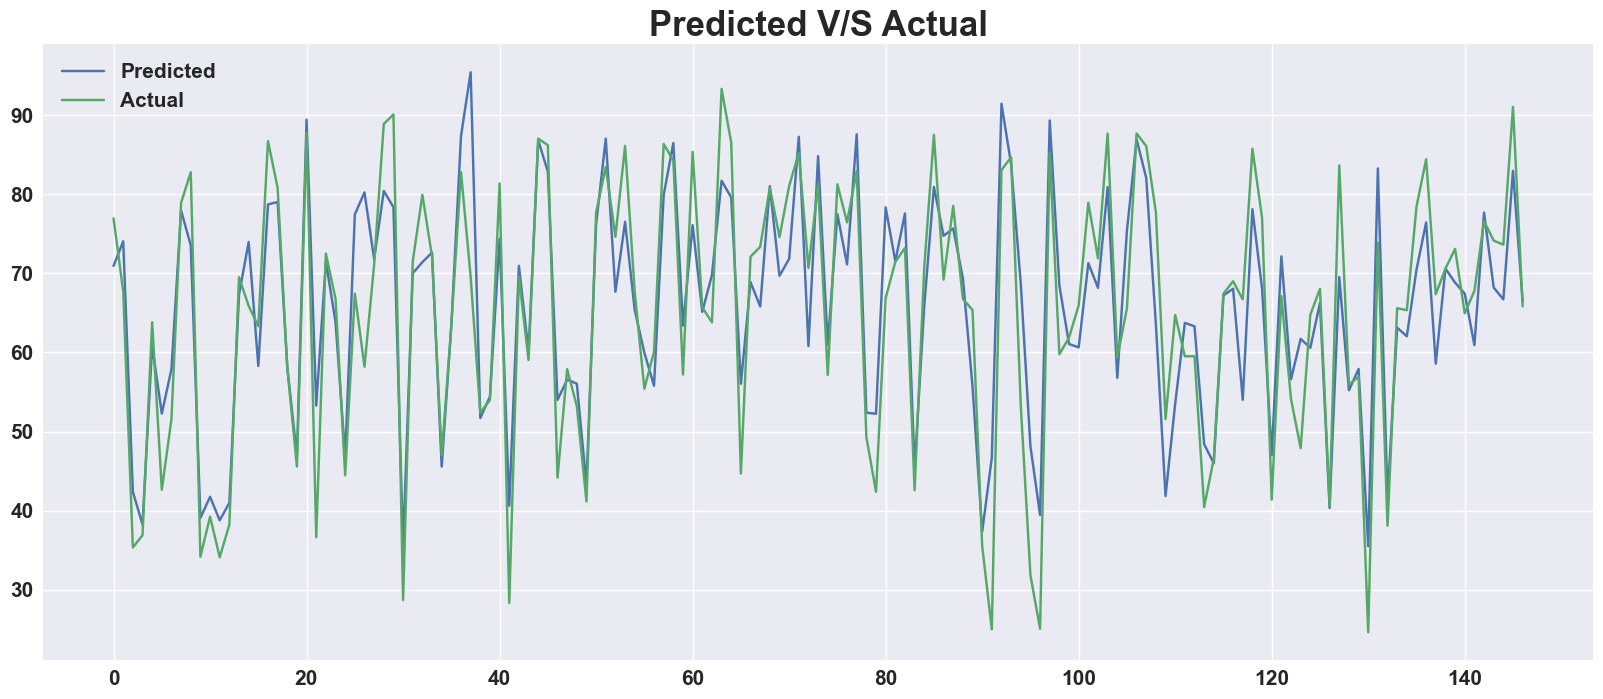

In [121]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

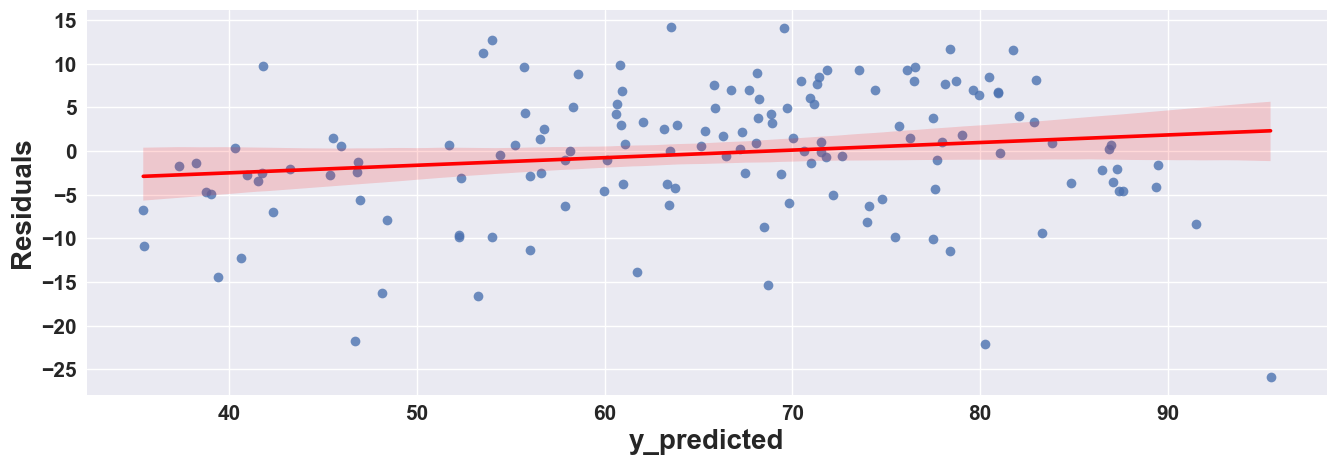

In [122]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

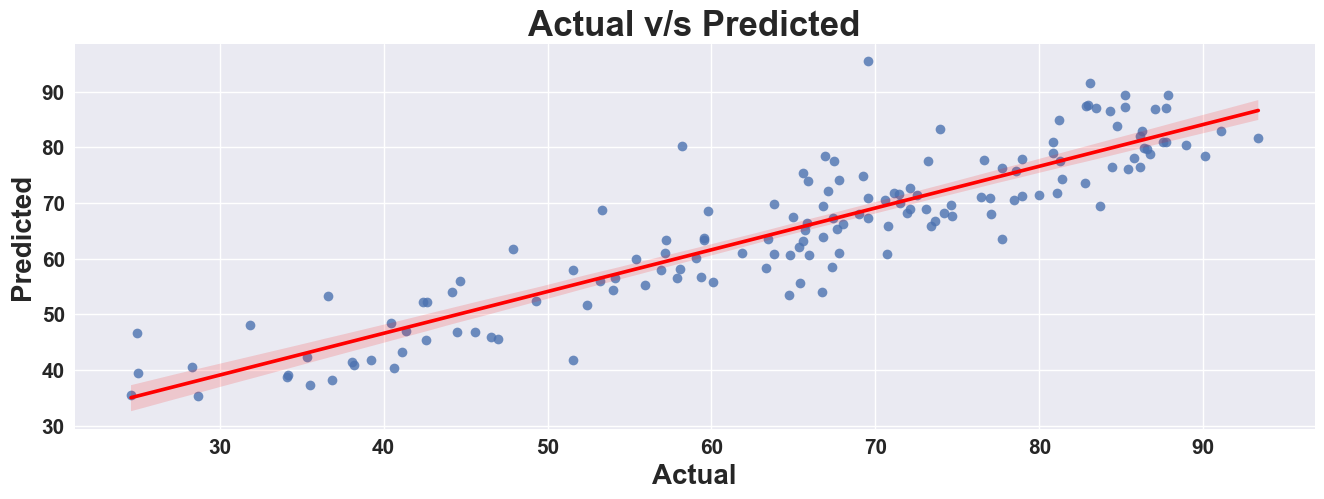

In [123]:
plot_scatter(y_pred,y_test)

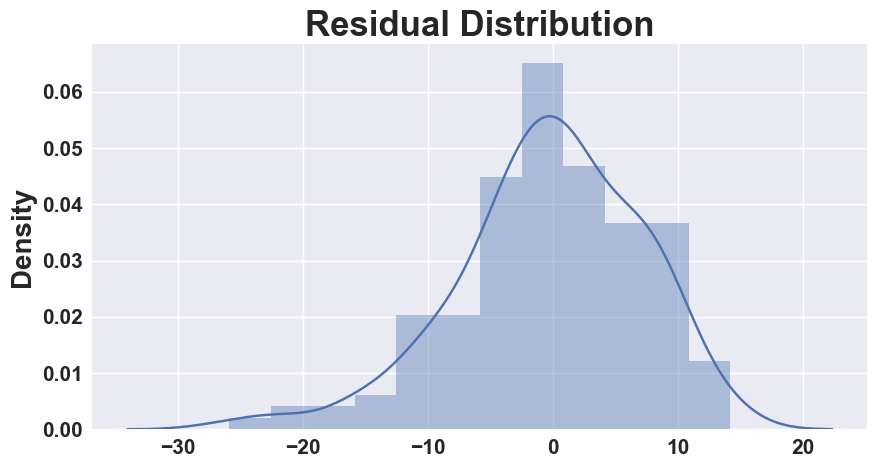

In [124]:
Residual_distPlot(y_pred,y_test)

# Elastic Net

In [125]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [126]:
elastic_net_reg.score(X_test,y_test)

0.8096464621707035

In [127]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred = elastic_net_reg.predict(X_test)

In [128]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8096464621707035

In [129]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.653862501926947.
The Mean Squred Error(MSE) is 54.07108063031725.
The Root Mean Squared Error(RMSE) is 7.353304062142218.
The R2 Score is 0.8096464621707035.
Adjusted R2 is 0.7941361739031312.


In [130]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [131]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,5.6512,54.2754,7.3672,0.8089,0.7934
1,Ridge(GridsearchCv Tunned),5.6538,54.0701,7.3532,0.8096,0.7941
2,ElasticNet(GridSearchCV-Tunned),5.6539,54.0711,7.3533,0.8096,0.7941


In [132]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-13, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [133]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.9}
The best negative mean squred error value is -56.914820863447794


In [134]:
import joblib
joblib.dump(elastic_net_reg, "Elastic.pkl")

['Elastic.pkl']

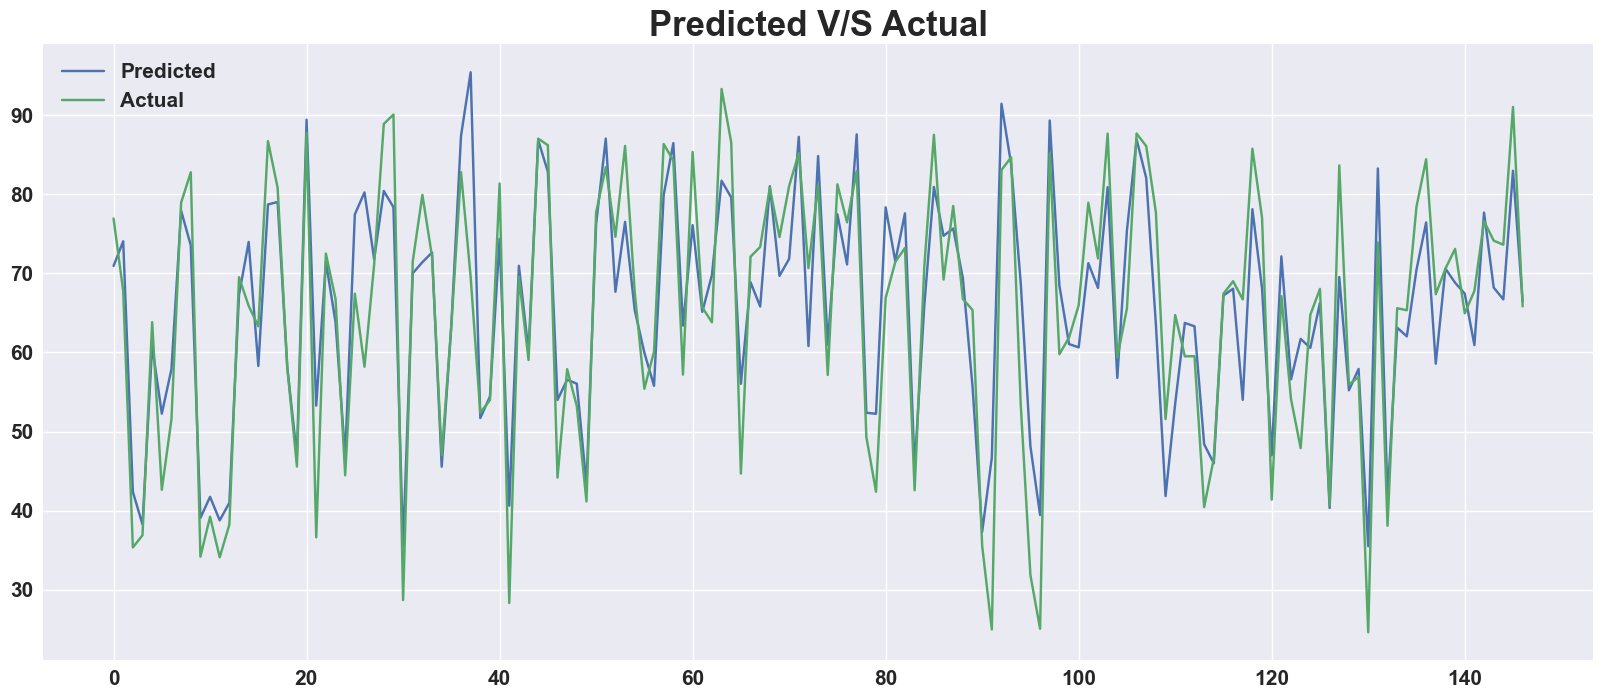

In [135]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

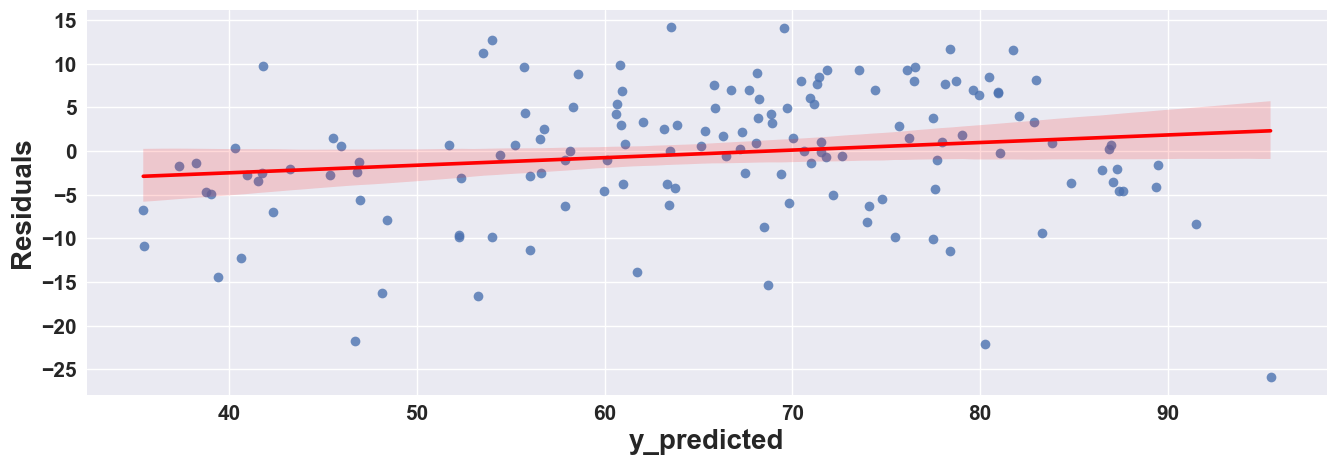

In [136]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

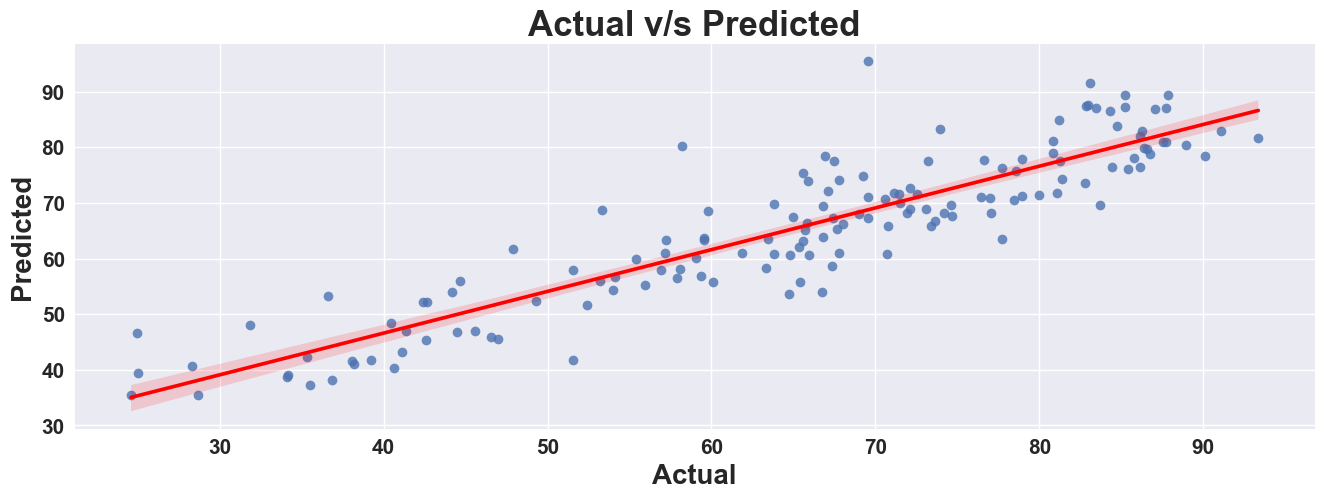

In [137]:
plot_scatter(y_pred,y_test)

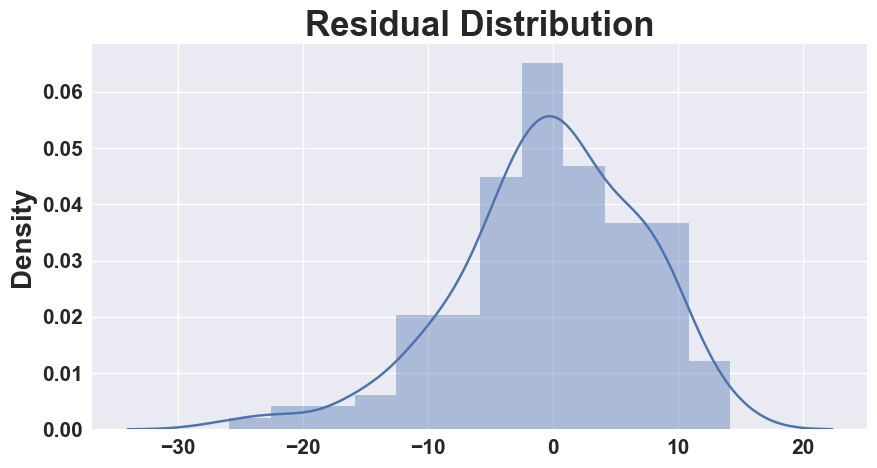

In [138]:
Residual_distPlot(y_pred,y_test)